# BIG DATA COMPANY - PROJECT

### Group members:
    
Moritz Scheer

Yuzhe Wang

Zongyi Guo

Gryy

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm

### Importing data

In [2]:
#df_original = pd.read_csv('dataport-export_gas_oct2015-mar2016.csv')
df_original = pd.read_csv('practice.csv')

In [3]:
df_original.head()

,localminute,dataid,meter_value
0,2015-10-01 00:00:10-05,739,88858
1,2015-10-01 00:00:13-05,8890,197164
2,2015-10-01 00:00:20-05,6910,179118
3,2015-10-01 00:00:22-05,3635,151318
4,2015-10-01 00:00:22-05,1507,390354


In [4]:
df_original.tail()

,localminute,dataid,meter_value
29993,2015-10-04 11:11:46-05,1283,167256
29994,2015-10-04 11:12:16-05,3635,151370
29995,2015-10-04 11:12:22-05,1714,147106
29996,2015-10-04 11:12:31-05,484,99398
29997,2015-10-04 11:12:35-05,8156,251908


In [5]:
df_original.dtypes

localminute    object
dataid          int64
meter_value     int64
dtype: object

### Optimizing Data Framework

In [6]:
df = df_original  #duplicated or still same object?
df.columns = ['date', 'id', 'measurement']
df.head()

,date,id,measurement
0,2015-10-01 00:00:10-05,739,88858
1,2015-10-01 00:00:13-05,8890,197164
2,2015-10-01 00:00:20-05,6910,179118
3,2015-10-01 00:00:22-05,3635,151318
4,2015-10-01 00:00:22-05,1507,390354


In [7]:
year = []
month = []
day = []
hour = []
minute = []
sec = []
absolute_sec = []


for i in range (len(df.date)):
    str_object = df.at[i, 'date']
    year.append(int(str_object[:4]))
    month.append(int(str_object[5:7]))
    day.append(int(str_object[8:10]))
    hour.append(int(str_object[11:13]))
    minute.append(int(str_object[14:16]))
    sec.append(int(str_object[17:19]))
    
    abs_sec = sec[i] + 60*minute[i] + 60*60*hour[i] + 24*60*60*(day[i] - 1)  
    if (month[i] == 10):   
        abs_sec += 0
    elif (month[i] == 11):
        abs_sec += 31*24*60*60
    elif (month[i] == 12):
        abs_sec += (30+31)*24*60*60
    elif (month[i] == 1):
        abs_sec += (31+30+31)*24*60*60
    elif (month[i] == 2):
        abs_sec += (31+31+30+31)*24*60*60
    elif (month[i] == 3):
        abs_sec += (29+31+31+30+31)*24*60*60
    absolute_sec.append(abs_sec) 
    

df.insert(1, 'year', year, allow_duplicates = True)
df.insert(2, 'month', month, allow_duplicates = True)
df.insert(3, 'day', day, allow_duplicates = True)
df.insert(4, 'hour', hour, allow_duplicates = True)
df.insert(5, 'minute', minute, allow_duplicates = True)
df.insert(6, 'sec', sec, allow_duplicates = True)
df.insert(7, 'absolute_sec', absolute_sec, allow_duplicates = True)

In [8]:
df.head()

,date,year,month,day,hour,minute,sec,absolute_sec,id,measurement
0,2015-10-01 00:00:10-05,2015,10,1,0,0,10,10,739,88858
1,2015-10-01 00:00:13-05,2015,10,1,0,0,13,13,8890,197164
2,2015-10-01 00:00:20-05,2015,10,1,0,0,20,20,6910,179118
3,2015-10-01 00:00:22-05,2015,10,1,0,0,22,22,3635,151318
4,2015-10-01 00:00:22-05,2015,10,1,0,0,22,22,1507,390354


In [9]:
df.tail()

,date,year,month,day,hour,minute,sec,absolute_sec,id,measurement
29993,2015-10-04 11:11:46-05,2015,10,4,11,11,46,299506,1283,167256
29994,2015-10-04 11:12:16-05,2015,10,4,11,12,16,299536,3635,151370
29995,2015-10-04 11:12:22-05,2015,10,4,11,12,22,299542,1714,147106
29996,2015-10-04 11:12:31-05,2015,10,4,11,12,31,299551,484,99398
29997,2015-10-04 11:12:35-05,2015,10,4,11,12,35,299555,8156,251908


In [10]:
df.dtypes

date            object
year             int64
month            int64
day              int64
hour             int64
minute           int64
sec              int64
absolute_sec     int64
id               int64
measurement      int64
dtype: object

### 1.1 Number of households

In [11]:
len(set(df.id))

123

There are 157 different households included in our data set of the measurement study.

### 1.1 Malfunctioning meters

In [12]:
#Code for finding and elimintaing malfunctioning meters

#datadframework should be same only without malfunctioning meters

### 1.2 Hourly readings

#### Helpful functions

In [13]:
def getID (df, id):
    df_id = pd.DataFrame({'date': [], 
                          'year': [],
                            'month': [],
                             'day': [],
                            'hour': [],
                            'minute': [],
                            'sec': [],
                          'absolute_sec': [],
                         'id': [],
                         'measurement': []})
    
    for i,j in df.iterrows():                 #change 100 back to len(df)
        if j.dataid == id:
            df_id = df_id.append(df.iloc[i, :])
            
    return df_id

In [14]:
def getMonth (df, month):
    df_month = pd.DataFrame({'date': [], 
                          'year': [],
                            'month': [],
                             'day': [],
                            'hour': [],
                            'minute': [],
                            'sec': [],
                             'absolute_sec': [],
                         'id': [],
                         'measurement': []})
    
    for i,j in df.iterrows():                    #change 100 back to len(df)
        if df.at[i, 'month'] == month:
            df_month = df_month.append(df.iloc[i, :])
            
    return df_month

In [15]:
def getIDandMonth (df, id, month):
    df_id_month = pd.DataFrame({'date': [], 
                          'year': [],
                            'month': [],
                             'day': [],
                            'hour': [],
                            'minute': [],
                            'sec': [],
                          'absolute_sec': [],
                         'id': [],
                         'measurement': []})
    
    for i in range (len(df)):                 #change 100 back to len(df)
        if df.at[i, 'id'] == id and df.at[i, 'month'] == month:
            df_id_month = df_id_month.append(df.iloc[i, :])
            
    return df_id_month

#### Selecting best month

Choosing month with most data samples as best month.

In [16]:
def findBestMonth(df):
    samples_per_month = [len(getMonth(df, 10)), len(getMonth(df, 11)), len(getMonth(df, 12)), 
                         len(getMonth(df, 1)), len(getMonth(df, 2)), len(getMonth(df, 3))]
    months = [10, 11, 12, 1, 2, 3]
    
    return months[samples_per_month.index(max(samples_per_month))]
    
    

#### Getting hourly readings

In [41]:
from scipy import interpolate

def hourlyReadings_IDandMonth(df, id, month):
    df_correct = getIDandMonth(df, id, month)
    
    x = df_correct.absolute_sec
    y = df_correct.measurement
    
    tck = interpolate.splrep(x, y)
    
    hourly_readings = []
    if month == 10 or month == 12 or moth == 1 or month == 3:
        for i in range (31*24):
            hourly_readings.append(interpolate.splev(i*60^2, tck))
    elif month == 11:
        for i in range (30*24):
            hourly_readings.append(interpolate.splev(i*60^2, tck))
    elif month == 2:
        for i in range (29*24):
            hourly_readings.append(interpolate.splev(i*60^2, tck))
        
    return hourly_readings

In [42]:
def hourlyReadings_Month(df, month):
    hourly_readings_month = {}

    for x in set(df.id):           #manche ids produzieren wohl Fehler "m > k must hold"
        hourly_readings_bm[x] = hourlyReadings(df, x, bm)
        
    return hourly_readings_month

#hourlyReadings(df, 8890, 10)   warum nan nan?

In [84]:
def plottingOneID(df, id, month):
    if month == 10 or month == 12 or month == 1 or month == 3:
        x = range(0, 31*24)
    elif month == 11:
        x = range(0, 30*24)
    elif month == 2:
        x = range(0, 29*24)

    y = hourlyReadings_IDandMonth(df, id, month)
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    ax.plot(x, y, '--k')
    ax.set_xlim(0, 31*24)
    #ax.set_ylim(-100, 100)
    ax.set_title('Hourly reading of Household {} for month {}'.format(id, month))
    plt.xlabel("Hour")
    plt.ylabel("Measurement")
    plt.grid()
    

In [151]:
def plottingThreeID(df, ids, month):
    if month == 10 or month == 12 or month == 1 or month == 3:
        x = range(0, 31*24)
    elif month == 11:
        x = range(0, 30*24)
    elif month == 2:
        x = range(0, 29*24)

    y1 = hourlyReadings_IDandMonth(df, ids[0], month)  #optimiere laufzeit mit _Month
    y2 = hourlyReadings_IDandMonth(df, ids[1], month)
    y3 = hourlyReadings_IDandMonth(df, ids[2], month)
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    ax.plot(x, y1, '--k', x, y2, '-', x, y3, '-.')
    ax.set_xlim(0, 31*24)
    #ax.set_ylim(-100, 100)
    ax.set_title('Hourly reading for month {}'.format(month))
    plt.xlabel("Hour")
    plt.ylabel("Measurement")
    plt.grid()
    plt.show()
    

#### Hourly readings of random households for best month (5x)

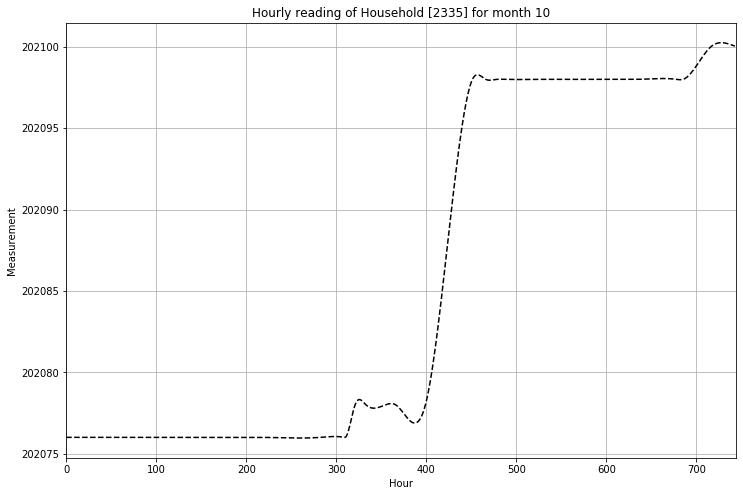

In [121]:
import random

bm = 10 #change to findBestMonth

plottingOneID(df, random.sample(set(df.id),  1), bm)

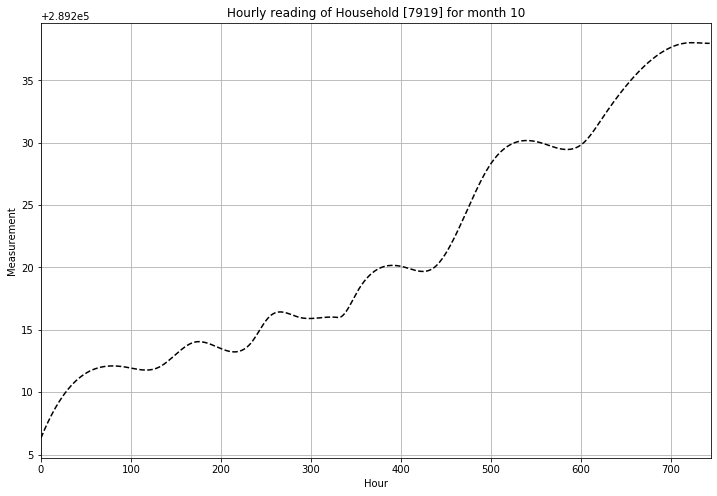

In [122]:
plottingOneID(df, random.sample(set(df.id),  1), bm)

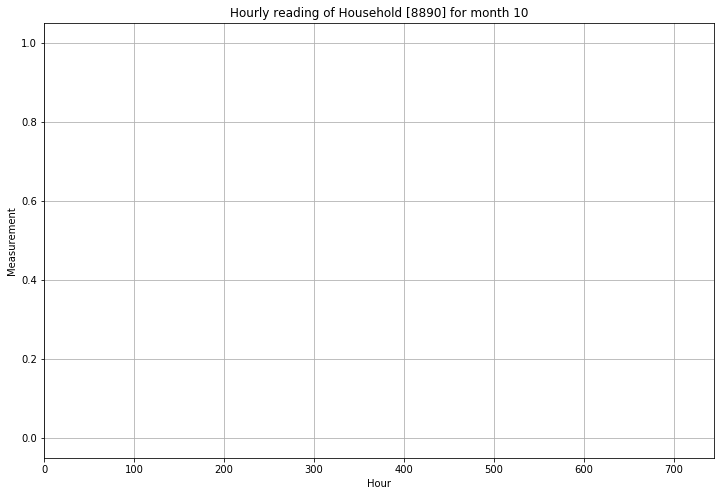

In [123]:
plottingOneID(df, random.sample(set(df.id),  1), bm)

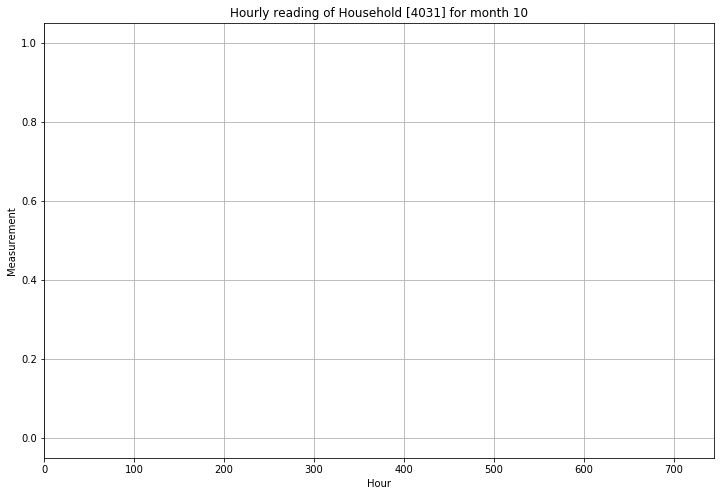

In [124]:
plottingOneID(df, random.sample(set(df.id),  1), bm)

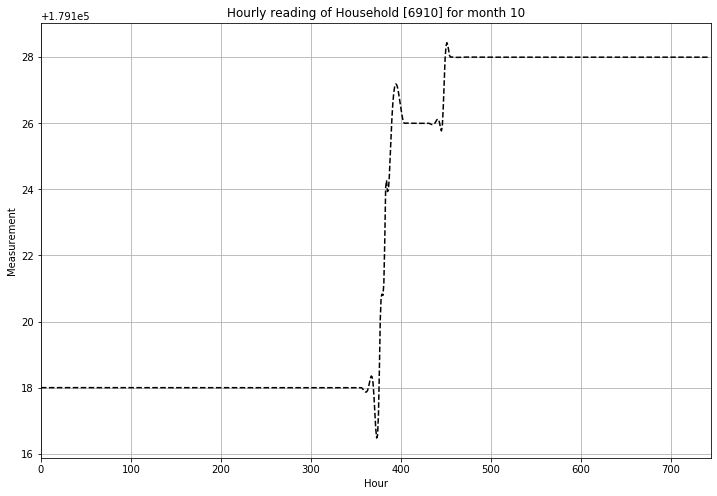

In [125]:
plottingOneID(df, random.sample(set(df.id),  1), bm)

#### Hourly readings of 3 random households for best month (3x)

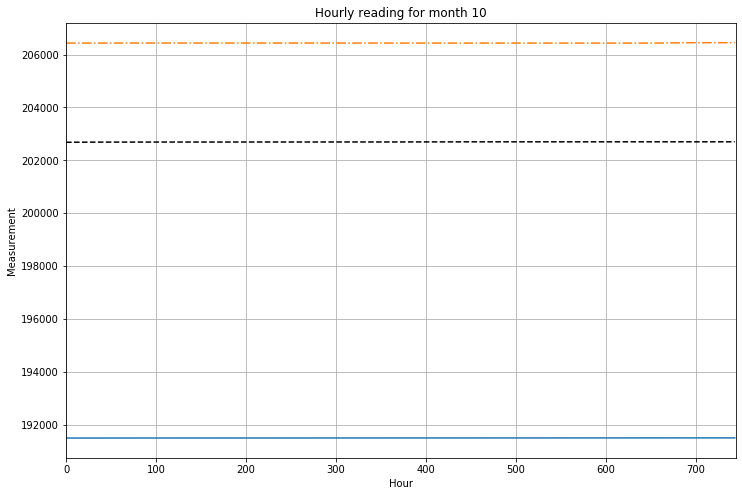

In [152]:
plottingThreeID(df, random.sample(set(df.id),  3), 10)

In [ ]:
#values to different to see something